In [1]:
# 3/3/24 Quantum Approximate Optimization Algorithm (QAOA) Vanilla Proxy 14 qubits
# importing all required libraries
import supermarq
import qiskit
import qiskit_superstaq as qss
import os
import json
from qiskit.visualization import plot_histogram

In [3]:
# connecting api key from my account to simulate the circuits
api_key = "d354451b8ab536a6b3d92b3207b0fb15626e8c11355217ca121ee5a9193c3bd0"
provider = qss.SuperstaqProvider(api_key)
# making sure to not run out of balance
print(provider.get_balance())

# setting circuit name to avoid having to change it everytime
name = "qaoa_v_proxy"

2.40 credits


In [4]:
# defining which circuit I want to use and how many qubits
qc = supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(num_qubits=14)
qc_circuit = qc.qiskit_circuit()

# setting the simulator that we will use to simulate our circuit (using ibm's statevector)
backend = provider.get_backend("ibmq_statevector_simulator")
job_qss = backend.run(qc_circuit, shots=1024, method="dry-run")

{'10000000000000': 1, '10010000000000': 2, '10101000000000': 1, '10011000000000': 3, '11011000000000': 1, '10111000000000': 1, '11111000000000': 1, '10110100000000': 1, '10011100000000': 1, '10111100000000': 1, '10101010000000': 1, '10011010000000': 1, '01011010000000': 1, '11011010000000': 1, '10011110000000': 2, '01111110000000': 1, '10000001000000': 1, '11001001000000': 1, '10011001000000': 1, '10000101000000': 1, '11001101000000': 2, '10011101000000': 1, '10100000100000': 1, '10110000100000': 1, '01110000100000': 1, '10000100100000': 1, '01110010100000': 3, '10011010100000': 1, '11011010100000': 1, '00111010100000': 1, '01111010100000': 3, '10010110100000': 1, '10000001100000': 5, '11100001100000': 1, '11010001100000': 1, '11101001100000': 1, '10001101100000': 1, '10101101100000': 1, '11001011100000': 1, '10100000010000': 1, '11010000010000': 1, '00110000010000': 1, '10110000010000': 1, '01110000010000': 1, '01111000010000': 3, '11111000010000': 1, '10100100010000': 1, '10110100010

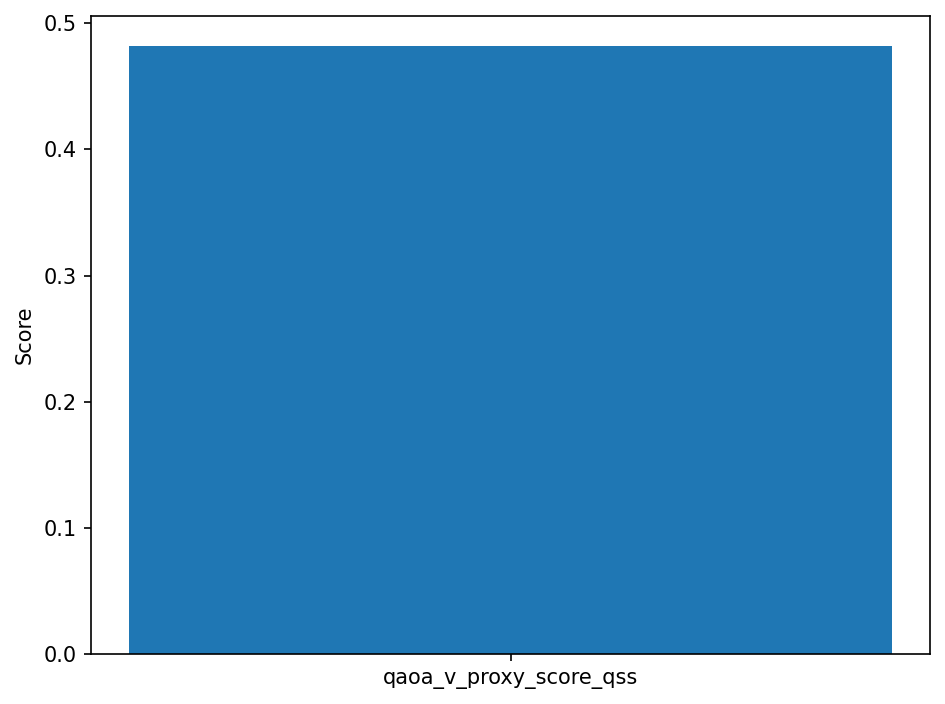

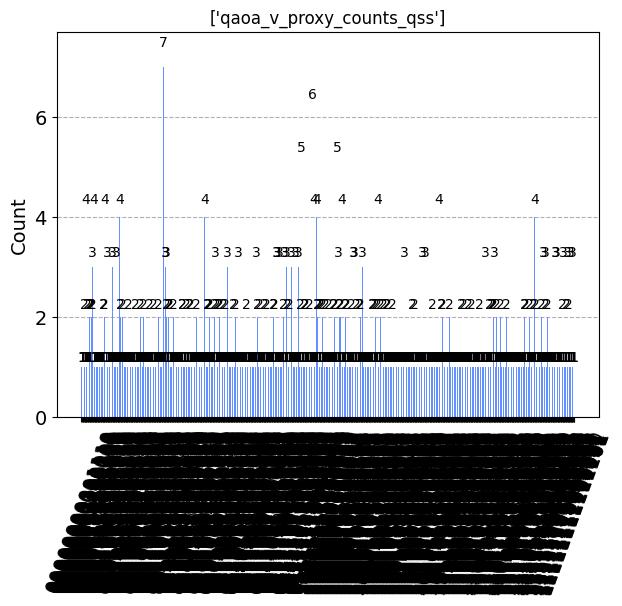

In [5]:
# gettng the results of the simulationg 
job = job_qss.result()

# getting the counts and printing them
counts = job.get_counts()
print(counts)

# measuring and getting fidelity of the result 
score = qc.score(counts)
print(score)

# logging results into a json file
with open(name + '_counts.json', 'w', encoding='utf-8') as f:
    json.dump(counts, f, ensure_ascii=False, indent=4)

# histogram of the score
supermarq.plotting.plot_results([score], [name + "_score_qss"])

# histogram of the counts
plot_histogram(counts, title=[name + "_counts_qss"])